# Normalization

https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
pd.set_option('display.max_columns', None)

## Visualize Data Distribution

In [2]:
df = pd.read_csv('glass.data',names=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','type_int'])

In [3]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type_int
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X = df.loc[:,'RI':'Fe']

In [5]:
y = df['type_int']

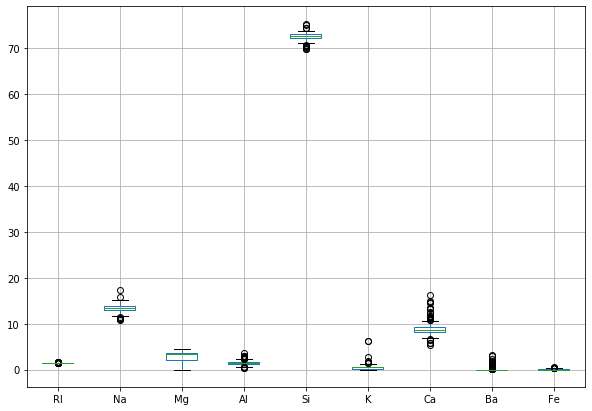

In [6]:
plt.figure(figsize=(10,7))
X.boxplot()

If you prefer seaborn:

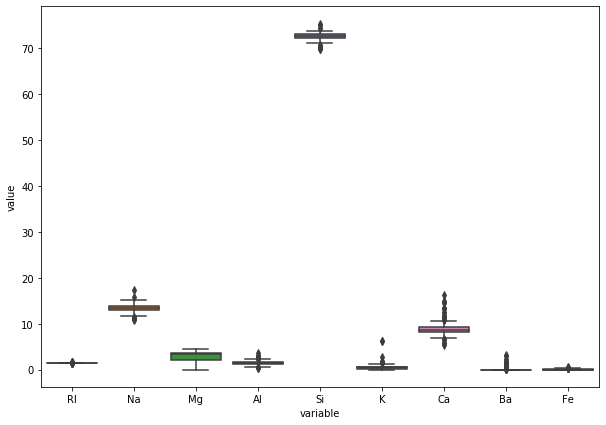

In [7]:
plt.figure(figsize=(10,7))
sns.boxplot(x="variable", y="value", data=pd.melt(X));

## Split Dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

## Standardization (mean removal and variance scaling)

In [9]:
from sklearn import preprocessing

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaler.mean_

array([1.51845953e+00, 1.33957895e+01, 2.68286550e+00, 1.44491228e+00,
       7.26319883e+01, 4.79239766e-01, 9.01754386e+00, 1.61520468e-01,
       5.26315789e-02])

In [12]:
scaler.scale_

array([0.00326373, 0.84874027, 1.43187828, 0.49907091, 0.80627337,
       0.56306493, 1.5127021 , 0.45763059, 0.09552918])

In [13]:
X_train_normalized = scaler.transform(X_train)

In [14]:
X_train_normalized.mean(axis=0)

array([ 8.75089475e-14, -2.26978929e-15,  2.51910254e-16, -1.80492398e-16,
       -4.15522068e-16,  9.34924652e-17,  8.41432187e-16, -1.55820775e-17,
        6.23283102e-17])

In [15]:
X_train_normalized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

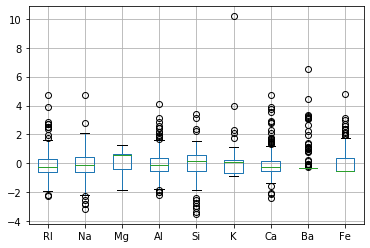

In [16]:
df_train_normalized = X_train.copy()
df_train_normalized.loc[:,'RI':'Fe'] = X_train_normalized
df_train_normalized.boxplot();

We train the model using `X_train_normalized`, then to predict any value `v`, first you use `scaler.transform(v)`, then you pass the result to the trained model

In [17]:
X_test_normalized = scaler.transform(X_test)
# y_pred = model.predict(X_test_normalized)

## Scaling features to a range

In [18]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train_normalized = scaler.transform(X_train)

In [20]:
X_train_normalized.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
X_train_normalized.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

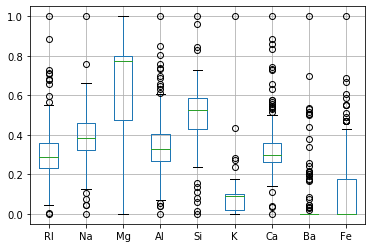

In [22]:
df_train_normalized = X_train.copy()
df_train_normalized.loc[:,'RI':'Fe'] = X_train_normalized
df_train_normalized.boxplot();